<a href="https://colab.research.google.com/github/nxxk23/PROJECT/blob/main/XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**class**

```
* (1) normal 22980
* (0) rapid 16337
* (2) prevention 13303
```


### Bi3

In [2]:
import pandas as pd
bi3 = pd.read_excel('/content/drive/MyDrive/ckdresearch2023/Assign/Assign8 : SplitFold /binary_3_Group_5_Fold.xlsx')
bi3 = bi3.iloc[:, 1:]
bi3.head(2)

,PatientUID,PatientVisitUID,Slopes,G1M2:ARB,G3M1:Statin,G5M2:NSAIDs,G1M5:Diuretic,G1M7:Beta blocker,G1M3:Dihydropyridine CCB,G1M6:MRA,...,newL25:Parathyroid hormone,newL26:Vitamin D,newL27:UrineAlbumin/Cr ratio,newL28:UrineProtein/Cr ratio,newL29:UrineVolume (24hrs),newL30:UrineUrea (24hrs),newL31:UrineSodium (24hrs),newL32:UrineProtein (24hrs),Group,Fold
0,2299,6947220,-12.812245,35,0,1,35,0,0,0,...,1,1,1,1,1,1,1,1,rapid,1
1,2299,3386255,-7.158596,90,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,rapid,1


In [3]:
bi3['NATNL'] = bi3['NATNL'].replace({0: 'Asian', 1: 'Asian', 3: 'Asian', 2: 'Non-Asian'})

In [4]:
bi3 = bi3.sort_values(['PatientUID', 'PatientVisitUID'])
bi3['TimeDiff'] = bi3.groupby('PatientUID')['LabCwhen'].diff().dt.days / 365
bi3['TimeDiff'] = bi3['TimeDiff'].fillna(0)

In [5]:
bi3['time_t1'] = pd.to_datetime(bi3['time_t1'])

In [6]:
columns_to_encode = ['VisitLocation', 'Group', 'NATNL']

# Apply label encoding using map
for column in columns_to_encode:
    encoding_map = {category: i for i, category in enumerate(bi3[column].unique())}
    bi3[column] = bi3[column].map(encoding_map)


### MF3

In [7]:
import pandas as pd
data3 = pd.read_excel('/content/drive/MyDrive/ckdresearch2023/Assign/Assign8 : SplitFold /df_3_Group_5_Fold.xlsx')
data3 = data3.iloc[:, 1:]
data3.head(2)

,PatientUID,PatientVisitUID,Slopes,InPatient,OutPatient,Emergency,time_t1,eGFR_t1,VisitLocation,StartDTTM,...,L19-Blood-sugar,L20-HbA1c,L21-Cholesterol,L22-Triglyceride,L23-LDL-Cholesterol,L24-HDL-Cholesterol,L28-UrineProtein-Cr-ratio,LabLocation,Group,Fold
0,2299,6947220,-12.812245,0,1,0,2021-03-04 10:01:42.113,48.54,เวชปฏิบัติทั่วไป (OPD)-D03,2019-12-19 08:19:38.647,...,89.0,5.562,205.0,69.0,139.0,76.0,36.916,1,rapid,1
1,2299,3386255,-7.158596,0,1,0,2017-10-03 09:19:54.710,63.60,เวชปฏิบัติทั่วไป (OPD)-D03,2016-08-15 08:13:26.043,...,91.0,5.284,215.0,81.0,123.0,99.0,21.019,1,rapid,1


In [8]:
data3['NATNL'] = data3['NATNL'].replace({0: 'Asian', 1: 'Asian', 3: 'Asian', 2: 'Non-Asian'})

In [9]:
data3 = data3.sort_values(['PatientUID', 'PatientVisitUID'])
data3['TimeDiff'] = data3.groupby('PatientUID')['LabCwhen'].diff().dt.days / 365
data3['TimeDiff'] = data3['TimeDiff'].fillna(0)

In [10]:
data3['time_t1'] = pd.to_datetime(data3['time_t1'])

In [11]:
columns_to_encode = ['VisitLocation', 'Group', 'NATNL']

# Apply label encoding using map
for column in columns_to_encode:
    encoding_map = {category: i for i, category in enumerate(data3[column].unique())}
    data3[column] = data3[column].map(encoding_map)

## Stage

In [12]:
def categorize_eGFR(eGFR_value):
    if eGFR_value >= 90:
        return 0
    elif eGFR_value >= 60:
        return 1
    elif eGFR_value >= 30:
        return 2
    elif eGFR_value >= 15:
        return 3
    else:
        return 4

bi3['Stage'] = bi3['eGFR_t1'].apply(categorize_eGFR)
data3['Stage'] = data3['eGFR_t1'].apply(categorize_eGFR)

In [13]:
data3['Stage'].value_counts()

2    30362
1    16698
3     3407
4     1323
0      830
Name: Stage, dtype: int64

# GridSearch

In [14]:
import json

json_file_path = '/content/drive/MyDrive/ckdresearch2023/Assign/GridSearch/xgb_group_data3.json'
with open(json_file_path, 'r') as f:
    xgb_group_data3 = json.load(f)

print(xgb_group_data3)

[{'fold': 5, 'best_params': {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}, 'best_score': 0.6475614775169677}, {'fold': 5, 'best_params': {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150}, 'best_score': 0.6480896706142023}, {'fold': 5, 'best_params': {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150}, 'best_score': 0.6470716499733811}, {'fold': 5, 'best_params': {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150}, 'best_score': 0.6489876399155697}, {'fold': 5, 'best_params': {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150}, 'best_score': 0.6452192158210283}]


In [ ]:
import json

json_file_path = '/content/drive/MyDrive/ckdresearch2023/Assign/GridSearch/xgb_group_binary3.json'
with open(json_file_path, 'r') as f:
    xgb_group_binary3 = json.load(f)

print(xgb_group_binary3)

In [ ]:
!pip install shap

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
import pandas as pd
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Model

## **Data3**

In [17]:
X = data3.drop(['Group', 'PatientUID', 'PatientVisitUID', 'eGFR_t1', 'time_t1', 'StartDTTM', 'EndDttm',
                    'LabCwhen', 'LabLocation', 'Fold','Slopes'], axis=1)
y = data3['Group']

In [18]:
from sklearn.model_selection import KFold
import pandas as pd
from sklearn.preprocessing import StandardScaler

num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=None)
data3_X = data3.drop(['Group', 'PatientUID', 'PatientVisitUID', 'eGFR_t1', 'time_t1', 'StartDTTM', 'EndDttm',
                    'LabCwhen', 'LabLocation', 'Fold','Slopes'], axis=1)
data3_y = data3['Group']
all_folds = data3['Fold'].unique()
X_train_scaled_list_data3 = []
y_train_list_data3 = []
X_test_scaled_list_data3 = []
y_test_list_data3 = []

for train_folds, test_fold in kf.split(all_folds):
    train_folds = all_folds[train_folds]
    val_fold = all_folds[test_fold][0]
    train_indices = data3['Fold'].isin(train_folds)
    test_indices = data3['Fold'] == val_fold
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
    X_train_scaled_list_data3.append(X_train_scaled)
    y_train_list_data3.append(y_train)
    X_test_scaled_list_data3.append(X_test_scaled)
    y_test_list_data3.append(y_test)
for fold, (X_train_scaled_fold, y_train_fold, X_test_scaled_fold, y_test_fold, train_fold_indices) in enumerate(
        zip(X_train_scaled_list_data3, y_train_list_data3, X_test_scaled_list_data3, y_test_list_data3, kf.split(all_folds))
):
    train_folds, test_fold = train_fold_indices
    #print(f"Training set size: {X_train_scaled_fold.shape}")
    #print(f"Test set size: {X_test_scaled_fold.shape}")
    #print(f"Folds in training set: {train_folds.tolist()}")
    #print(f"Folds in test set: {test_fold}")
    #print("---\n")

In [20]:
data3_label_encoder = LabelEncoder()
data3['Group'] = data3_label_encoder.fit_transform(data3['Group'])

num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=None)
data3_all_folds = data3['Fold'].unique()

data3_accuracy_per_fold = []
data3_conf_mat_list = []
data3_precision_per_fold = []
data3_recall_per_fold = []
data3_f1_per_fold = []
data3_loss_per_fold = []

data3_X_train_before_resampled = []
data3_y_train_before_resampled = []

data3_test_sample_list = []

In [25]:
for fold, (train_folds, test_fold) in enumerate(kf.split(data3_all_folds)):
    train_folds = data3_all_folds[train_folds]
    test_fold = data3_all_folds[test_fold][0]
    train_indices = data3['Fold'].isin(train_folds)
    test_indices = data3['Fold'] == test_fold

    data3_X_train, data3_X_test = data3_X[train_indices], data3_X[test_indices]
    data3_y_train, data3_y_test = data3_y[train_indices], data3_y[test_indices]

    # Store the original X_train and y_train
    data3_X_train_before_resampled.append(data3_X_train)
    data3_y_train_before_resampled.append(data3_y_train)

    # Store the number of test samples
    data3_test_sample_list.append(len(data3_X_test))

    # Scale
    data3_scaler = StandardScaler()
    data3_X_train_scaled = data3_scaler.fit_transform(data3_X_train)
    data3_X_test_scaled = data3_scaler.transform(data3_X_test)

    # Create and train XGBoost model using best parameters
    best_params = xgb_group_data3[fold]['best_params']
    model_x = XGBClassifier(**best_params, objective='multi:softmax', num_class=3, random_state=42)
    model_x.fit(data3_X_train_scaled, data3_y_train)

    # Make predictions on the test set
    data3_y_pred = model_x.predict(data3_X_test_scaled)

    # Evaluate performance
    data3_conf_mat = confusion_matrix(data3_y_test, data3_y_pred)
    data3_conf_mat_list.append(data3_conf_mat)

    data3_accuracy = accuracy_score(data3_y_test, data3_y_pred)
    data3_precision = precision_score(data3_y_test, data3_y_pred, average='weighted')
    data3_recall = recall_score(data3_y_test, data3_y_pred, average='weighted')
    data3_f1 = f1_score(data3_y_test, data3_y_pred, average='weighted')

    data3_accuracy_per_fold.append(data3_accuracy)
    data3_precision_per_fold.append(data3_precision)
    data3_recall_per_fold.append(data3_recall)
    data3_f1_per_fold.append(data3_f1)

    print(f"Fold {fold + 1} - Accuracy: {data3_accuracy*100:.2f}%")
    print(f"Precision: {data3_precision:.4f}, Recall: {data3_recall:.4f}, F1-Score: {data3_f1:.4f}")
    print("---\n")



Fold 1 - Accuracy: 64.33%
Precision: 0.6244, Recall: 0.6433, F1-Score: 0.6146
---

Fold 2 - Accuracy: 65.16%
Precision: 0.6315, Recall: 0.6516, F1-Score: 0.6254
---

Fold 3 - Accuracy: 65.03%
Precision: 0.6313, Recall: 0.6503, F1-Score: 0.6234
---

Fold 4 - Accuracy: 65.47%
Precision: 0.6389, Recall: 0.6547, F1-Score: 0.6269
---

Fold 5 - Accuracy: 64.40%
Precision: 0.6233, Recall: 0.6440, F1-Score: 0.6177
---



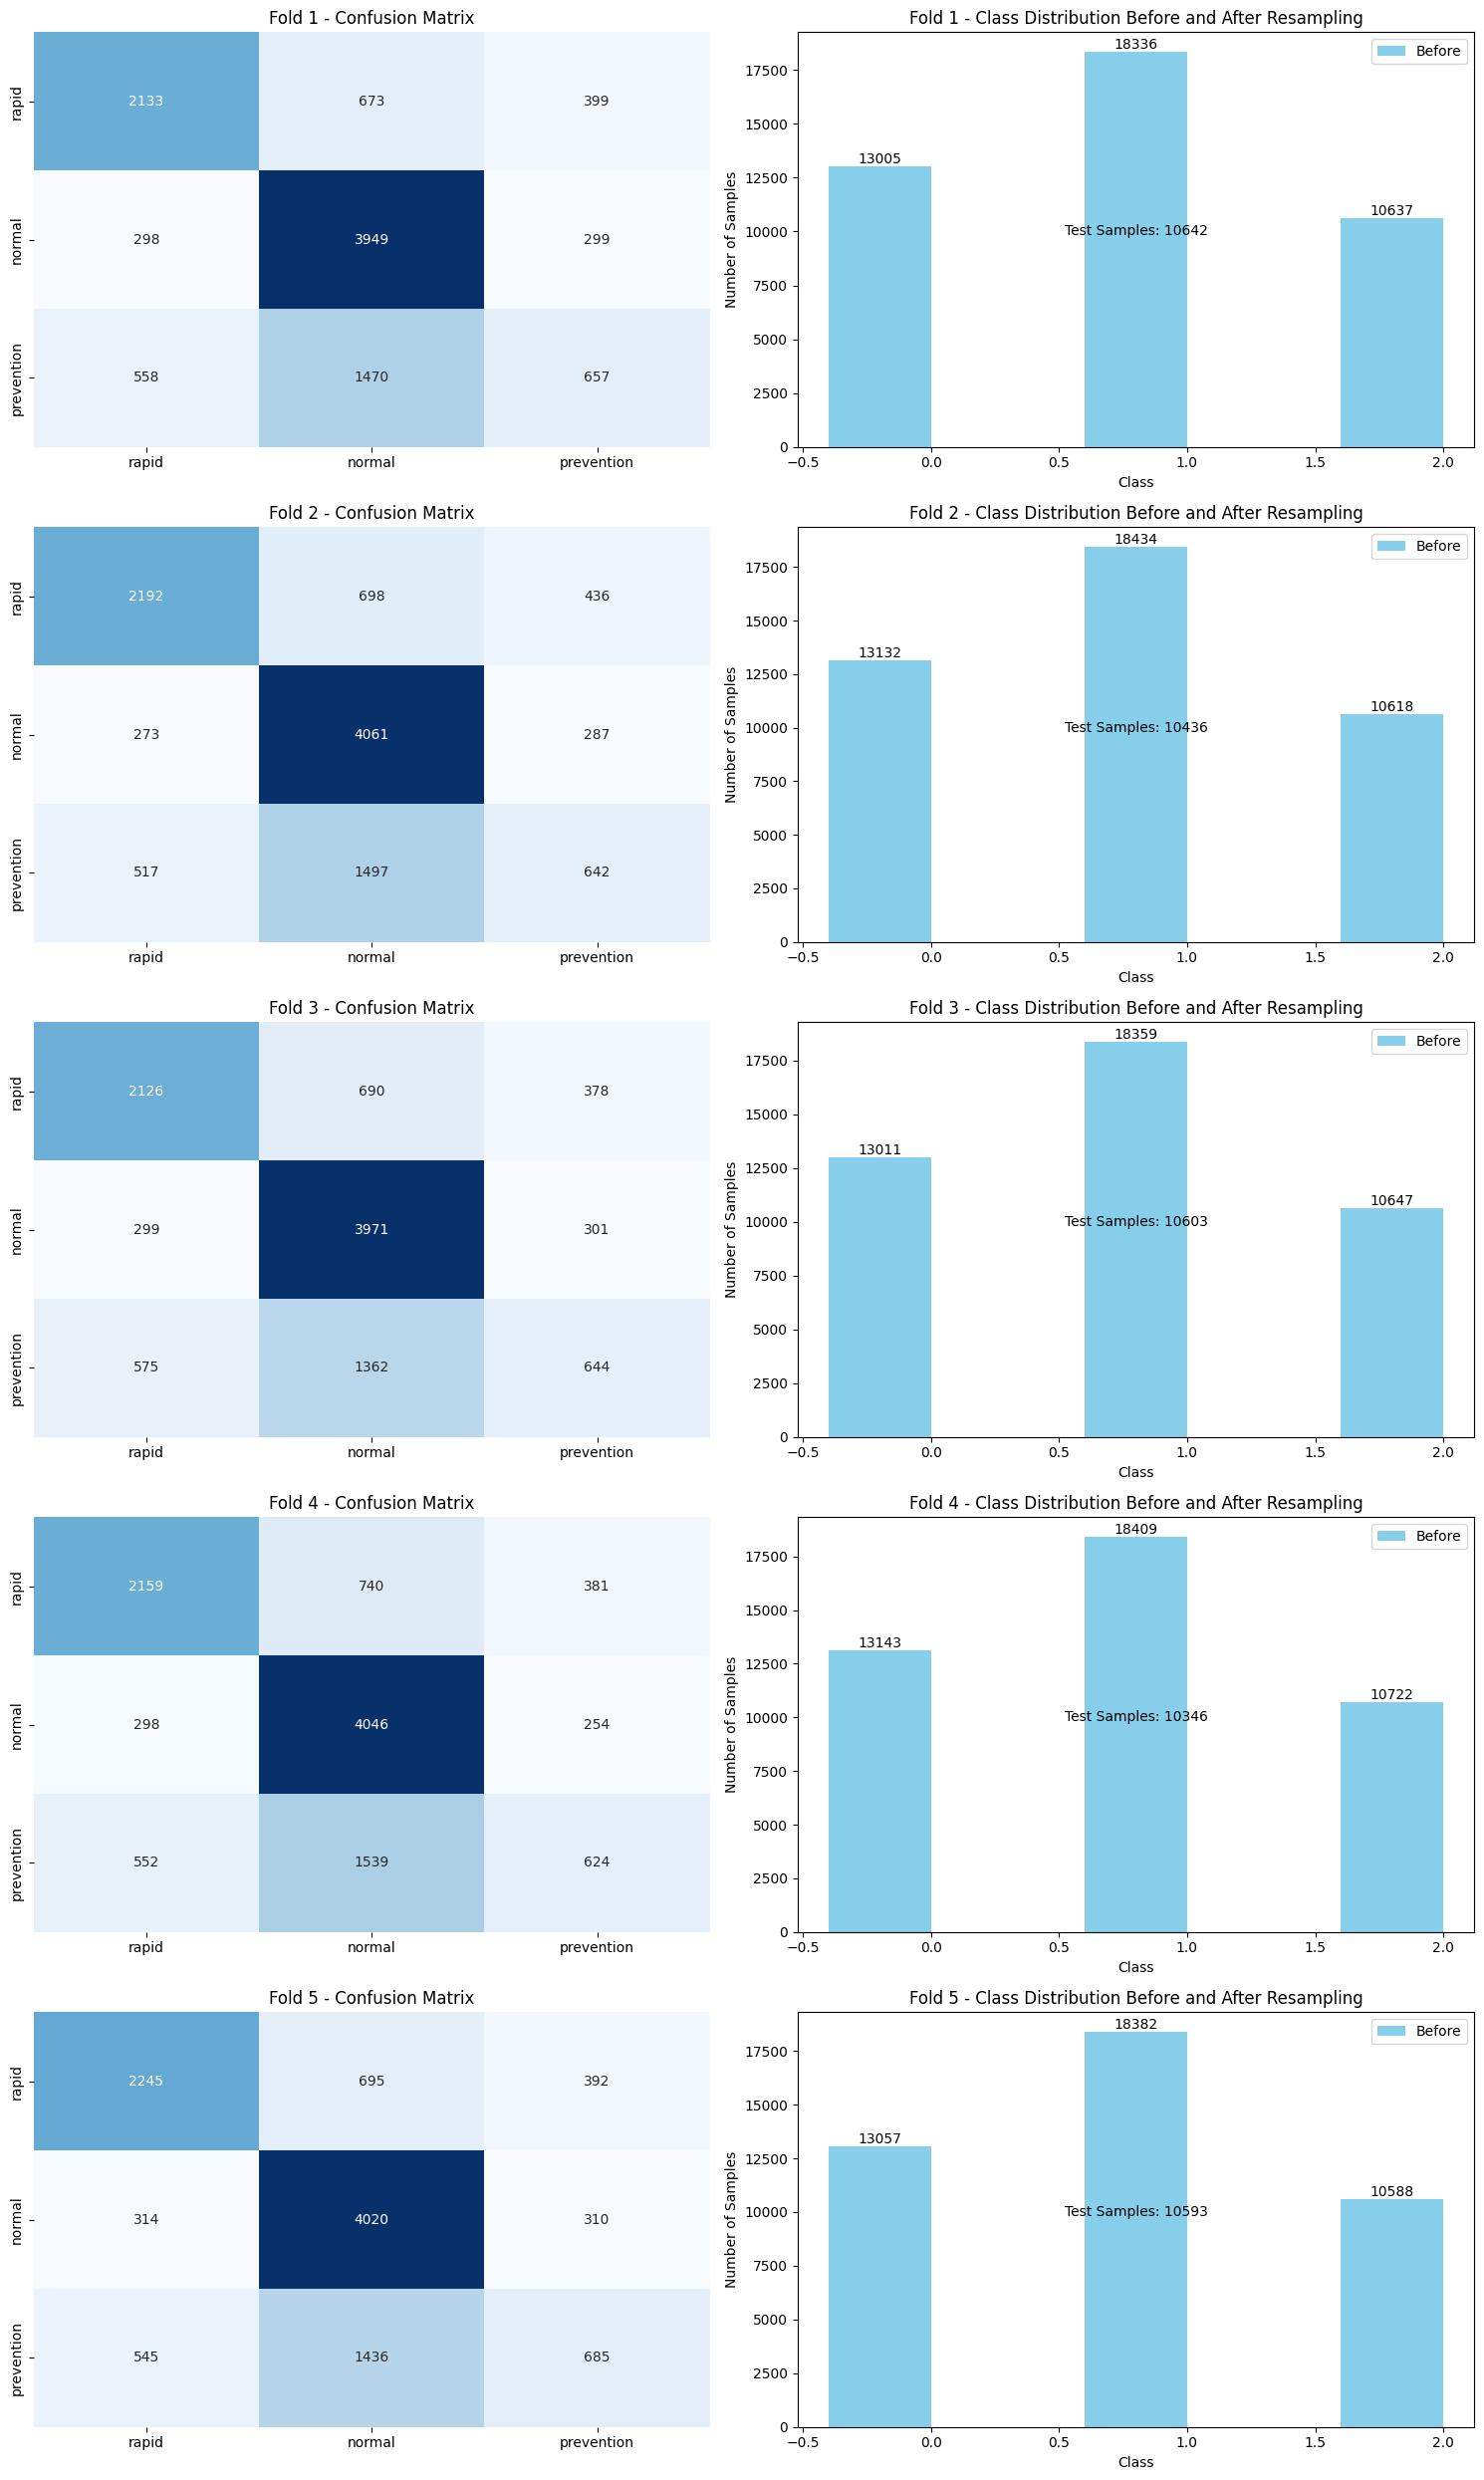

In [33]:
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt

class_names = ['rapid', 'normal', 'prevention']
num_classes = len(class_names)  # Number of classes

fig, axes = plt.subplots(nrows=num_folds, ncols=2, figsize=(15, 5 * num_folds))
fig.subplots_adjust(hspace=0.5)

for fold in range(num_folds):
    conf_mat = data3_conf_mat_list[fold]

    # Subplot 1: Confusion Matrix
    ax1 = axes[fold, 0]
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax1)
    ax1.set_title(f'Fold {fold + 1} - Confusion Matrix')
    ax1.set_xticklabels(class_names)  # Set class names on x-axis
    ax1.set_yticklabels(class_names)

    # Subplot 2: Original vs. Resampled Train Samples
    ax2 = axes[fold, 1]

    original_label_counts = Counter(data3_y_train_before_resampled[fold])

    # Convert class names to numerical labels
    original_classes = range(num_classes)

    ax2.bar([cls - 0.2 for cls in original_classes], original_label_counts.values(), width=0.4, color='skyblue', label='Before')
    ax2.set_title(f'Fold {fold + 1} - Class Distribution Before and After Resampling')
    ax2.set_xlabel('Class')
    ax2.set_ylabel('Number of Samples')
    ax2.legend()

    # Add text labels for each class in train set
    for cls, count in zip(original_classes, original_label_counts.values()):
        ax2.text(cls - 0.2, count + 2, str(count), ha='center', va='bottom')

    # Add text label for the number of test samples in the center
    center_x = 0.8
    center_y = 10000
    ax2.text(center_x, center_y, f'Test Samples: {data3_test_sample_list[fold]}', ha='center', va='center')

# Display the subplots
plt.tight_layout()
plt.show()


### shap

## **Binary3**

In [ ]:
binary3_X = bi3.drop(['Group', 'PatientUID', 'PatientVisitUID', 'eGFR_t1', 'time_t1', 'StartDTTM', 'EndDttm',
               'LabCwhen', 'LabLocation','Fold','Slopes'], axis=1)
binary3_y = bi3['Group']

In [ ]:
from sklearn.model_selection import KFold
import pandas as pd
from sklearn.preprocessing import StandardScaler

num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=None)
X = bi3.drop(['PatientUID', 'PatientVisitUID', 'eGFR_t1', 'time_t1', 'StartDTTM', 'EndDttm',
                'LabCwhen', 'LabLocation', 'Fold', 'Slopes','Group'], axis=1)
y = bi3['Group']
all_folds = bi3['Fold'].unique()
X_train_scaled_list_bi3 = []
y_train_list_bi3 = []
X_test_scaled_list_bi3 = []
y_test_list_bi3 = []
for train_folds, test_fold in kf.split(all_folds):
    train_folds = all_folds[train_folds]
    val_fold = all_folds[test_fold][0]
    train_indices = bi3['Fold'].isin(train_folds)
    test_indices = bi3['Fold'] == val_fold
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
    X_train_scaled_list_bi3.append(X_train_scaled)
    y_train_list_bi3.append(y_train)
    X_test_scaled_list_bi3.append(X_test_scaled)
    y_test_list_bi3.append(y_test)
for fold, (X_train_scaled_fold, y_train_fold, X_test_scaled_fold, y_test_fold, train_fold_indices) in enumerate(
        zip(X_train_scaled_list_bi3, y_train_list_bi3, X_test_scaled_list_bi3, y_test_list_bi3, kf.split(all_folds))
):
    train_folds, test_fold = train_fold_indices
    #print(f"Training set size: {X_train_scaled_fold.shape}")
    #print(f"Test set size: {X_test_scaled_fold.shape}")
    #print(f"Folds in training set: {train_folds.tolist()}")
    #print(f"Folds in test set: {test_fold}")
    #print("---\n")


In [ ]:
binary3_label_encoder = LabelEncoder()
bi3['Group'] = binary3_label_encoder.fit_transform(binary3['Group'])

num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=None)
binary3_all_folds = binary3['Fold'].unique()

binary3_accuracy_per_fold = []
binary3_conf_mat_list = []
binary3_precision_per_fold = []
binary3_recall_per_fold = []
binary3_f1_per_fold = []
binary3_loss_per_fold = []

binary3_X_train_before_resampled = []
binary3_y_train_before_resampled = []

binary3_test_sample_list = []


In [ ]:
for fold, (train_folds, test_fold) in enumerate(kf.split(binary3_all_folds)):
    train_folds = binary3_all_folds[train_folds]
    test_fold = binary3_all_folds[test_fold][0]
    train_indices = binary3['Fold'].isin(train_folds)
    test_indices = binary3['Fold'] == test_fold

    binary3_X_train, binary3_X_test = binary3_X[train_indices], binary3_X[test_indices]
    binary3_y_train, binary3_y_test = binary3_y[train_indices], binary3_y[test_indices]

    # Store the original X_train and y_train
    binary3_X_train_before_resampled.append(binary3_X_train)
    binary3_y_train_before_resampled.append(binary3_y_train)

    # Store the number of test samples
    binary3_test_sample_list.append(len(binary3_X_test))

    # Scale
    binary3_scaler = StandardScaler()
    binary3_X_train_scaled = binary3_scaler.fit_transform(binary3_X_train_resampled)
    binary3_X_test_scaled = binary3_scaler.transform(binary3_X_test)

    # Create and train XGBoost model using best parameters
    best_params = xgb_group_binary3[fold]['best_params']
    model_x = XGBClassifier(**best_params, objective='multi:softmax', random_state=42)
    model_x.fit(binary3_X_train_scaled, binary3_y_train_resampled)

    # Make predictions on the test set
    binary3_y_pred = model_x.predict(binary3_X_test_scaled)

    # Evaluate performance
    binary3_conf_mat = confusion_matrix(binary3_y_test, binary3_y_pred)
    binary3_conf_mat_list.append(binary3_conf_mat)

    binary3_accuracy = accuracy_score(binary3_y_test, binary3_y_pred)
    binary3_precision = precision_score(binary3_y_test, binary3_y_pred, average='weighted')
    binary3_recall = recall_score(binary3_y_test, binary3_y_pred, average='weighted')
    binary3_f1 = f1_score(binary3_y_test, binary3_y_pred, average='weighted')

    binary3_accuracy_per_fold.append(binary3_accuracy)
    binary3_precision_per_fold.append(binary3_precision)
    binary3_recall_per_fold.append(binary3_recall)
    binary3_f1_per_fold.append(binary3_f1)

    print(f"Fold {fold + 1} - Accuracy: {binary3_accuracy*100:.2f}%")
    print(f"Precision: {binary3_precision:.4f}, Recall: {binary3_recall:.4f}, F1-Score: {binary3_f1:.4f}")
    print("---\n")


Fold 1 - Accuracy: 60.76%
Precision: 0.5401, Recall: 0.6076, F1-Score: 0.5594
---

Fold 2 - Accuracy: 57.00%
Precision: 0.5517, Recall: 0.5700, F1-Score: 0.5595
---

Fold 3 - Accuracy: 61.31%
Precision: 0.5367, Recall: 0.6131, F1-Score: 0.5580
---

Fold 4 - Accuracy: 52.27%
Precision: 0.5456, Recall: 0.5227, F1-Score: 0.5299
---

Fold 5 - Accuracy: 60.54%
Precision: 0.5441, Recall: 0.6054, F1-Score: 0.5617
---



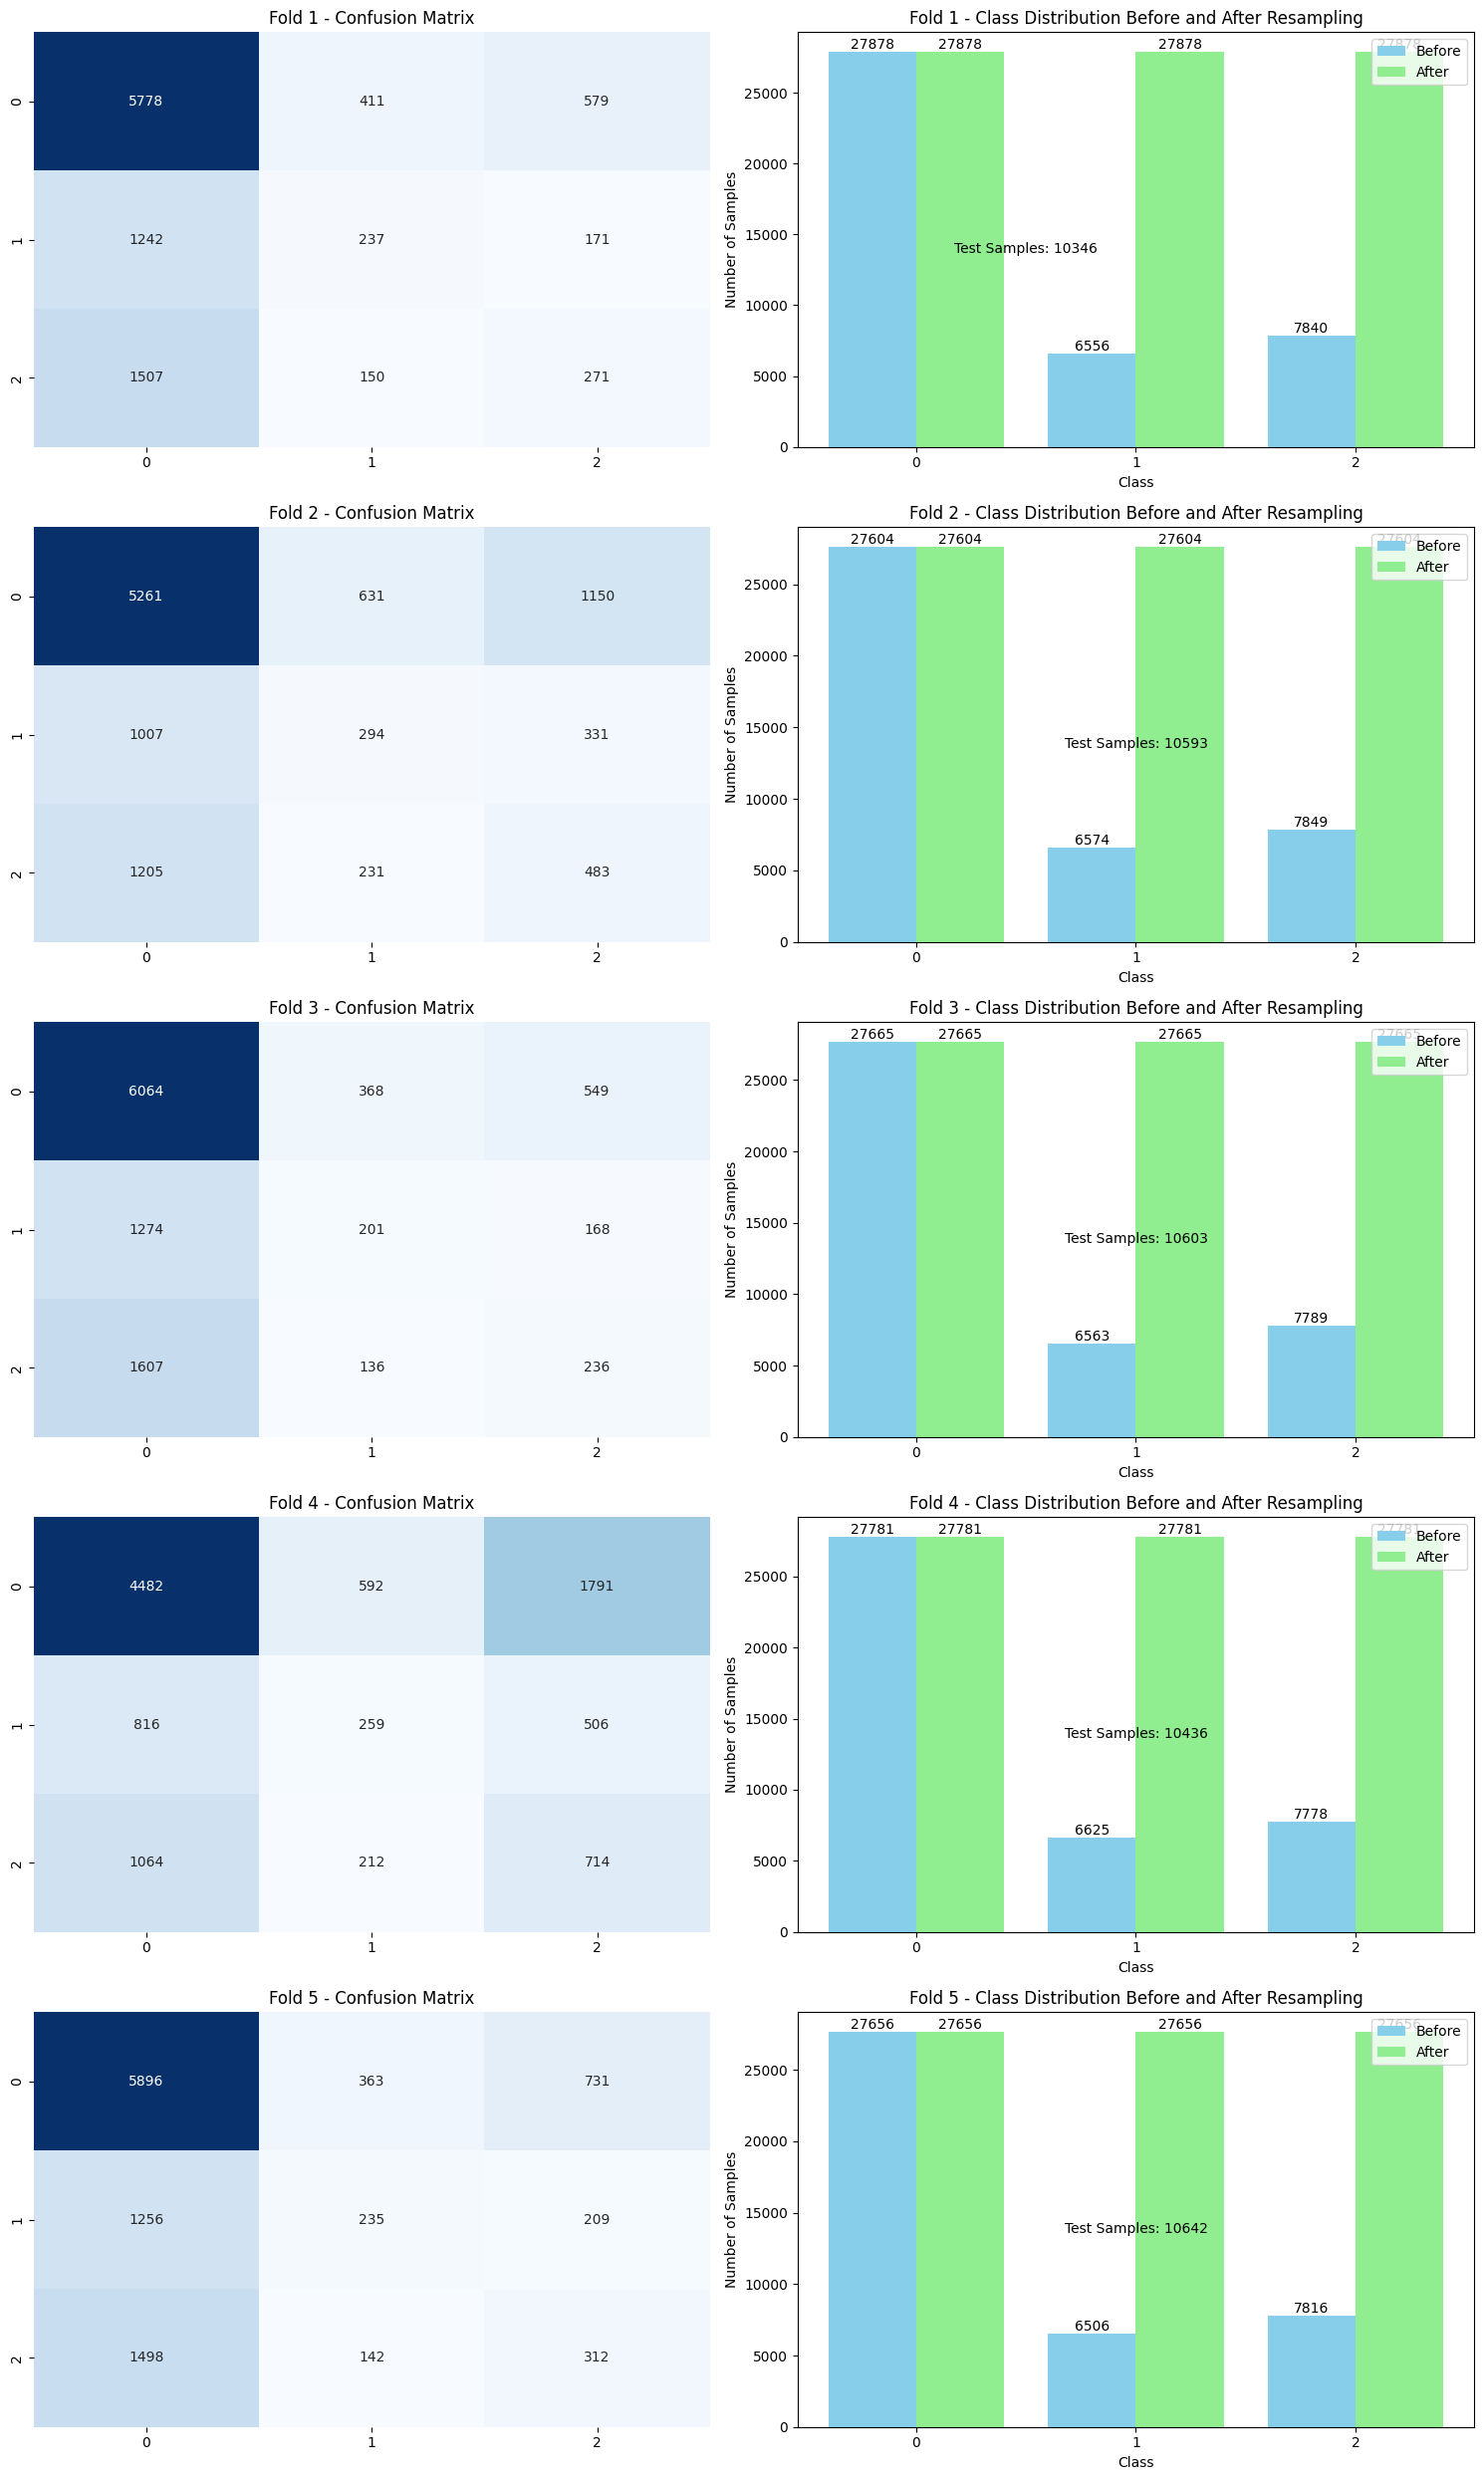

In [ ]:
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=num_folds, ncols=2, figsize=(15, 5 * num_folds))
fig.subplots_adjust(hspace=0.5)

for fold in range(num_folds):
    conf_mat = binary3_conf_mat_list[fold]

    # Subplot 1: Confusion Matrix
    ax1 = axes[fold, 0]
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax1)
    ax1.set_title(f'Fold {fold + 1} - Confusion Matrix')

    # Subplot 2: Original vs. Resampled Train Samples
    ax2 = axes[fold, 1]

    original_label_counts = Counter(binary3_y_train_before_resampled[fold])

    original_classes = list(original_label_counts.keys())
    resampled_classes = list(resampled_label_counts.keys())

    ax2.bar([cls - 0.2 for cls in original_classes], original_label_counts.values(), width=0.4, color='skyblue', label='Before')
    ax2.bar([cls + 0.2 for cls in resampled_classes], resampled_label_counts.values(), width=0.4, color='lightgreen', label='After')

    ax2.set_title(f'Fold {fold + 1} - Class Distribution Before and After Resampling')
    ax2.set_xlabel('Class')
    ax2.set_ylabel('Number of Samples')
    ax2.set_xticks(resampled_classes)
    ax2.legend()

    # Add text labels for each class in train set
    for cls, count in original_label_counts.items():
        ax2.text(cls - 0.2, count + 2, str(count), ha='center', va='bottom')

    for cls, count in resampled_label_counts.items():
        ax2.text(cls + 0.2, count + 2, str(count), ha='center', va='bottom')

    # Add text label for the number of test samples in the center
    center_x = 0.5 * (resampled_classes[-1] - original_classes[0]) + original_classes[0]
    center_y = 0.5 * (max(max(original_label_counts.values()), max(resampled_label_counts.values())))
    ax2.text(center_x, center_y, f'Test Samples: {binary3_test_sample_list[fold]}', ha='center', va='center')

# Display the subplots
plt.tight_layout()
plt.show()


# **CCM**

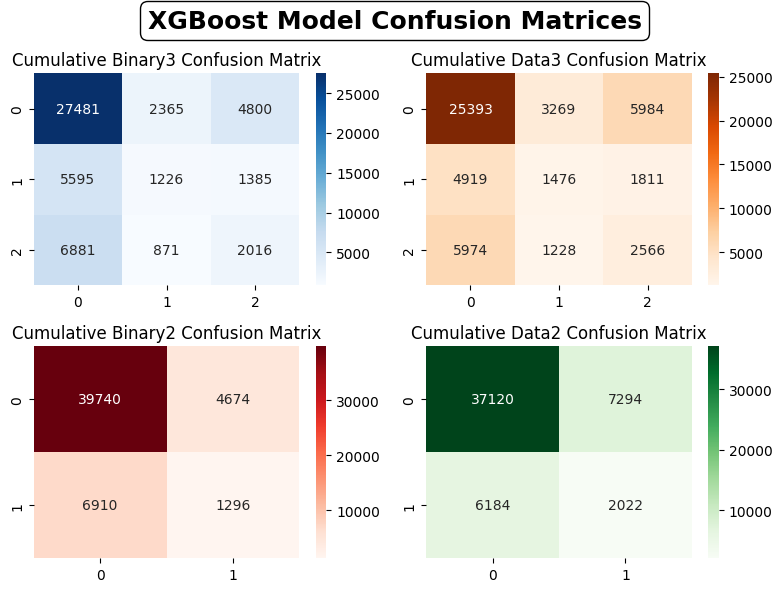

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
cumulative_bi3_conf_mat = np.sum(binary3_conf_mat_list, axis=0)
cumulative_data3_conf_mat = np.sum(data3_conf_mat_list, axis=0)
cumulative_data2_conf_mat = np.sum(data2_conf_mat_list, axis=0)
cumulative_bi2_conf_mat = np.sum(binary2_conf_mat_list, axis=0)

# Plotting subplots
fig, axes = plt.subplots(2, 2, figsize=(8, 6))

fig.suptitle('XGBoost Model Confusion Matrices', fontsize=18, bbox=dict(boxstyle='round,pad=0.3', facecolor='white', edgecolor='black'), weight='bold', va='top')

# Plot cumulative confusion matrices
sns.heatmap(cumulative_bi3_conf_mat, annot=True, fmt='d', cmap='Blues', ax=axes[0, 0])
axes[0, 0].set_title('Cumulative Binary3 Confusion Matrix')

sns.heatmap(cumulative_data3_conf_mat, annot=True, fmt='d', cmap='Oranges', ax=axes[0, 1])
axes[0, 1].set_title('Cumulative Data3 Confusion Matrix')

sns.heatmap(cumulative_bi2_conf_mat, annot=True, fmt='d', cmap='Reds', ax=axes[1, 0])
axes[1, 0].set_title('Cumulative Binary2 Confusion Matrix')

sns.heatmap(cumulative_data2_conf_mat, annot=True, fmt='d', cmap='Greens', ax=axes[1, 1])
axes[1, 1].set_title('Cumulative Data2 Confusion Matrix')


plt.tight_layout()
plt.show()